# ML1 - 1.5 Supervised Learning Algorithms Part 2 - B) Artificial Neural Networks (ANN)

### This script contains the following:

## A) Decision Tree
#### 1. Importing Libraries
#### 2. Data Cleaning
#### 3. Decision Tree
        Confusion Matrix
        Pruning original DT
        Debilt DT
        Kassel DT
        Oslo DT
        Stockholm DT
        Valentia DT
        Regression
#### 4. Export
## B) Artificial Neural Networks (ANN)
#### 1. Importing Libraries
#### 2. Data Cleaning
#### 3. Artificial Neural Networks (ANN)
#### 4. Export

#### 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [15]:
# Importing ClimateWins scaled dataset

climatewins_d = pd.read_pickle(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\Prepared Python Files\ML1 1.5_decision_tree_climate_pt1.pkl')

In [17]:
# Importing pleasant weather dataset

pleasant_w = pd.read_pickle(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\Prepared Python Files\ML1 1.5_decision_tree_pleasant_pt1.pkl')

In [19]:
# Creating Path

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts'

In [21]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 1 - Basics of Machine Learning for Analysts'

#### 2. Data Cleaning

In [24]:
climatewins_d.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


##### This is the same Climatewins_d data set used in ML1 1.5 A) Decision Tree portion of script. That means that the three weather stations GDANSK, ROMA, TOURS and SONNBLICK are already dropped as well as the columns DATE and MONTH.

In [27]:
climatewins_d.shape

(22950, 137)

In [31]:
pleasant_w.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
pleasant_w.shape

(22950, 14)

##### This is the same pleasant_w data set used in ML1 1.5 A) Decision Tree portion of script. That means that the weather station SONNBLICK is already dropped as well as the DATE column. We won't have to drop anything here.

#### 3. Artificial Neural Networks (ANN)

In [37]:
# Create an 'X' matrix

X = climatewins_d
y = pleasant_w                   

In [39]:
print(X.shape)
print(y.shape)

(22950, 137)
(22950, 14)


In [41]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 137)
(5738, 137)
(17212, 14)
(5738, 14)


In [45]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,-1.417570,-0.027930,-0.619294,-0.750867,1.186458,-0.325270,-0.179228,0.535359,1.359088,1.116341,...,0.169692,0.058712,-0.563290,-0.005290,-0.159420,-0.024706,-0.408784,1.464779,1.584476,1.174547
20472,1.076130,-0.573924,0.555086,-0.215925,-0.821838,-0.265148,-0.179228,-1.065304,-1.655817,-1.458775,...,-0.443701,-0.081896,-0.003958,-1.065618,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
18269,0.660514,-0.846921,0.735760,-1.270525,-1.004410,-0.305229,0.817688,-0.926116,-1.655817,-1.887961,...,-0.443701,1.042971,0.406218,-0.829990,-0.455304,-0.024706,-0.078390,-2.921377,-3.225169,-2.190135
7713,-1.417570,-0.027930,-0.167609,0.410721,-0.585568,-0.445514,-0.179228,-0.253374,-1.601495,-1.550743,...,1.396477,1.183580,-1.029400,-1.112744,1.379179,-0.024706,-1.039536,-1.178932,-0.656381,-1.126091
21958,0.660514,3.111534,-0.619294,-0.689731,-0.821838,1.919289,-0.179228,-0.949314,-0.582946,-0.692371,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
11464,0.660514,-0.983419,-1.070979,1.847422,1.583822,-0.445514,-0.179228,1.277695,1.073894,0.656499,...,-1.057093,0.902363,2.196080,2.315650,-0.490810,-0.024706,2.714940,0.713725,0.300082,0.973241
3984,-1.001953,-0.027930,0.374412,-0.001949,-0.811098,-0.445514,-0.179228,-0.230176,-0.908881,-1.044917,...,0.169692,1.042971,-1.197200,-0.829990,-0.455304,-0.024706,-0.078390,0.052797,0.382065,-0.292110
4752,1.076130,-0.027930,1.639129,-0.001949,-1.251420,-0.445514,-0.179228,-1.065304,-1.941011,-2.102554,...,1.396477,1.886622,1.804548,-1.183432,-0.490810,-0.024706,-1.039536,-0.067372,0.491375,-0.608447
11092,0.660514,-0.027930,0.645423,0.150892,0.670960,0.556521,-0.179228,0.210586,0.720797,0.748467,...,0.783085,0.902363,-1.029400,0.866535,0.420514,-0.024706,-0.018319,0.563514,0.436720,0.656903
21377,-1.417570,-1.119918,-1.341989,-0.093653,-0.005632,-0.445514,-0.179228,2.066427,1.141798,0.549202,...,-0.443701,-0.081896,-0.003958,1.773704,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [55]:
# Scaling the data

scaler = StandardScaler()

# Fit the train data

scaler.fit(X_train)

# Scaling the X data

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [49]:
# Note the majority features have a mean of zero and a standard deviation of one. There are values of -2 and lower noted.

In [51]:
# Assign the scaled data to DataFrames

X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

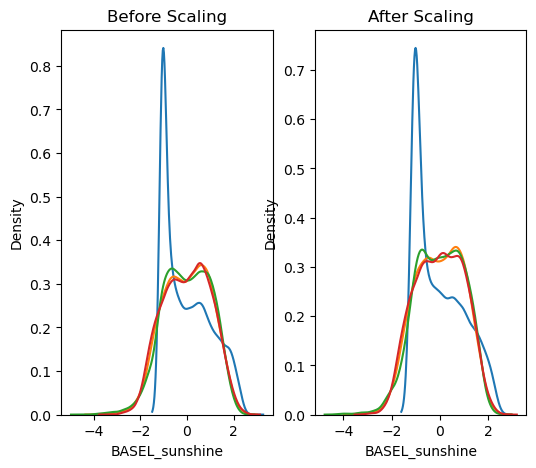

In [59]:
# Show scaling differences, BASEL columns are used in this example

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_sunshine'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_min'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_max'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_test_df['BASEL_sunshine'], ax=ax2)
sns.kdeplot(X_test_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_test_df['BASEL_temp_min'], ax=ax2)
sns.kdeplot(X_test_df['BASEL_temp_max'], ax=ax2)
plt.savefig('ML1 1.5B - Scaling for ANN.png')
plt.show()

##### There is minimal difference between the images of the data before it was scaled and the data after it was scaled. The data was already pretty close before scaling it down. I don't believe there will be much difference when using it in the ANN, but there may be a small change. 

##### ANN Attempt 1

In [68]:
# Create the ANN
# hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
# and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)

# Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [70]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4859981408319777
0.49477169745555943


##### My training accuracy is at 48.5% and my testing accuracy is at 49.4%. The current hidden layers, iterations, and expected loss (tol), are not proving to be at their best.

In [74]:
locations = list({x.split("_")[0] for x in climatewins_d.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

IndexError: list index out of range

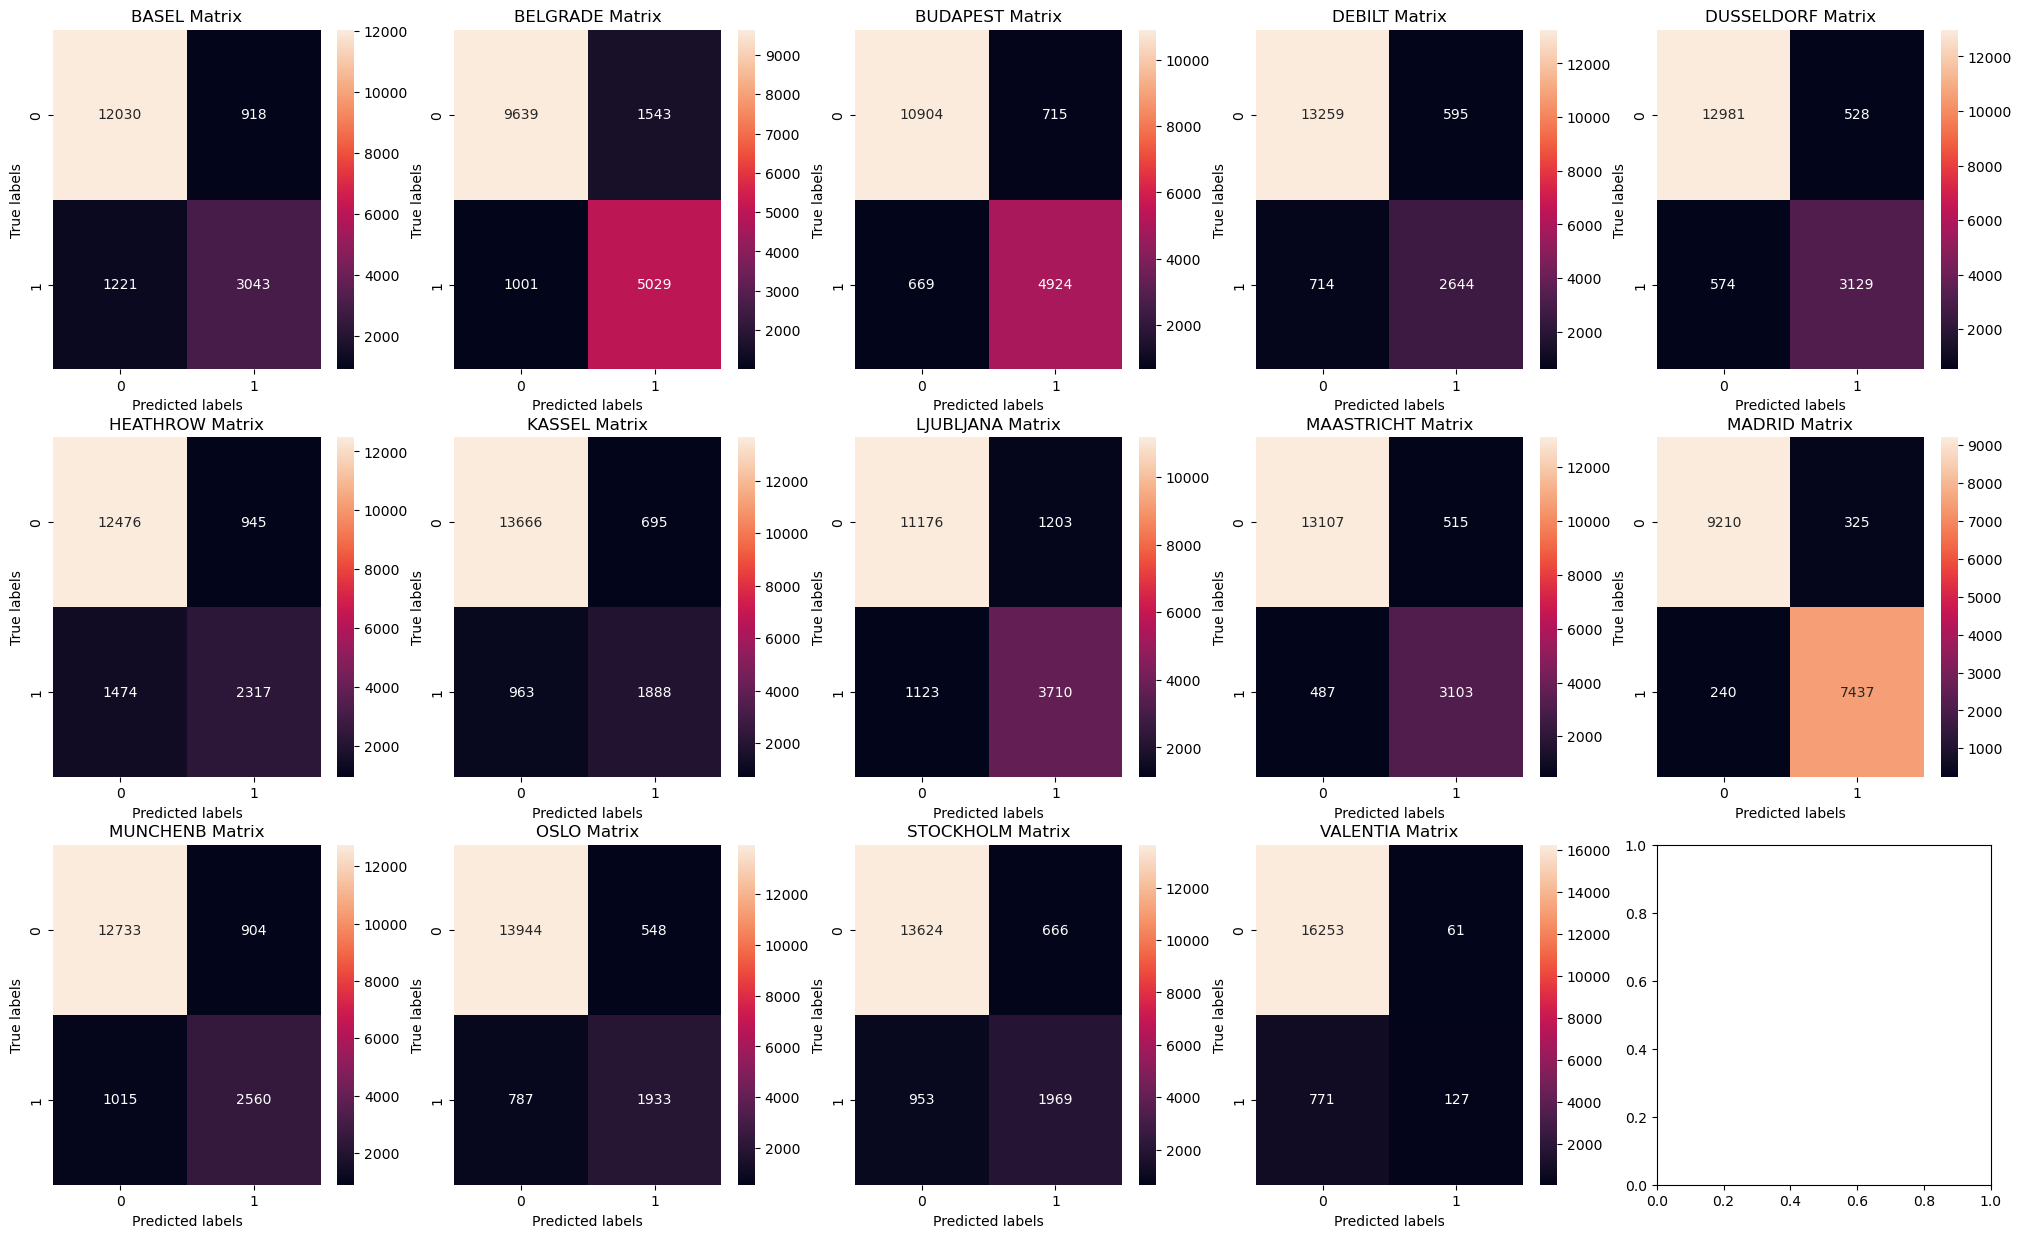

In [76]:
# Train Confusion Matrix 1

key = "_pleasant_weather"
stations = []
fig_cm_train, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrices Train1.png")

IndexError: list index out of range

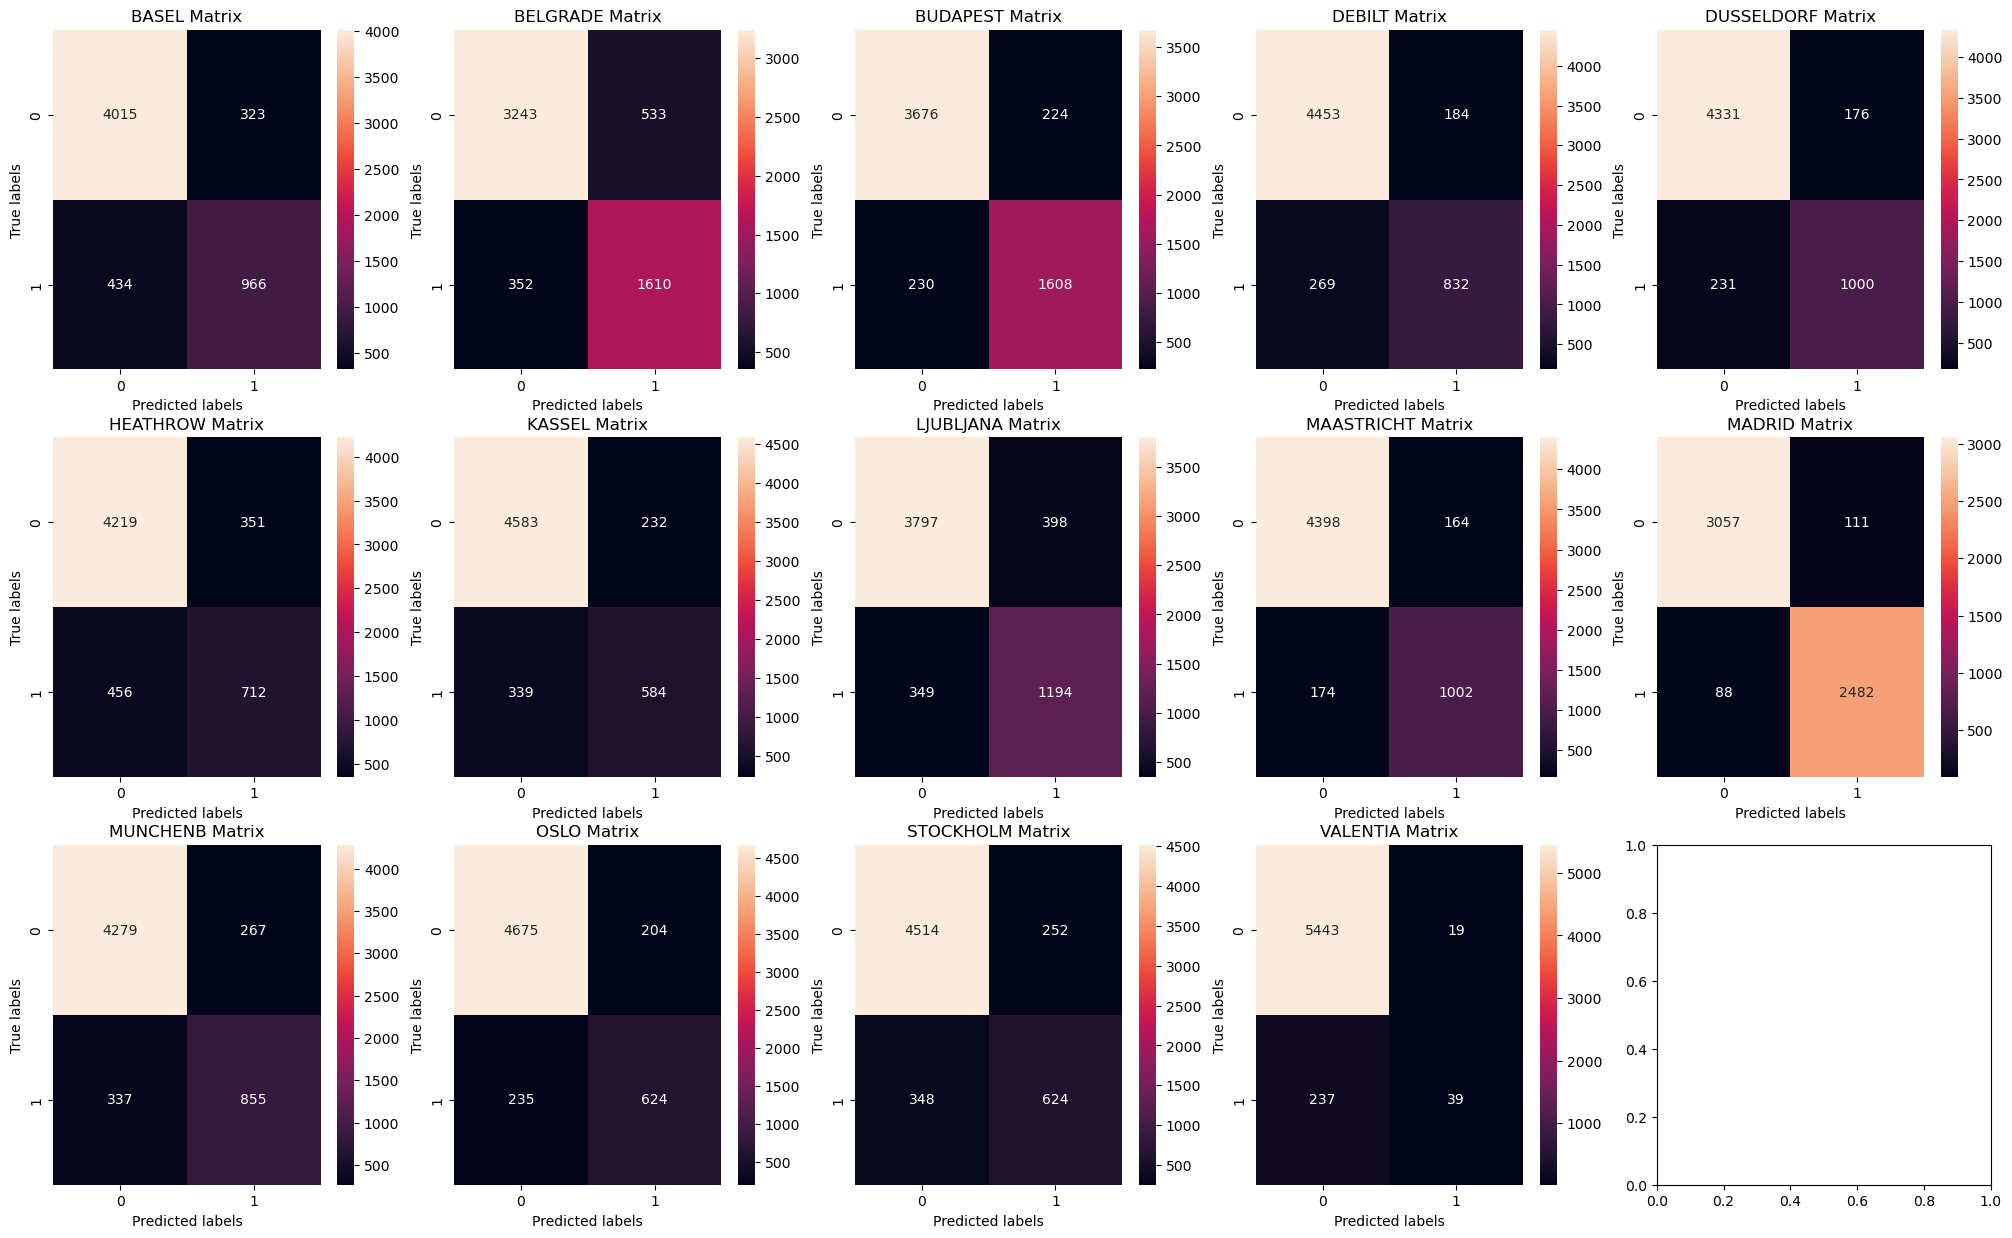

In [78]:
# Test Confusion Matrix 1

key = "_pleasant_weather"
stations = []
fig_cm_test, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrix Test1.png")

######

##### ANN Attempt 2

In [80]:
# Create the ANN
# hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
# and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)

# Fit the data to the model
mlp2.fit(X_train, y_train)

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [83]:
y_pred = mlp2.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp2.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5223681152684174
0.5256186824677588


##### There is mild improvement from the previous confusion matrix. Both the training accuracy and the testing accuracy are at 52%. That's a 3-4% increase. We've changed the layer size but, left the interations and expected loss (tol) the same.

IndexError: list index out of range

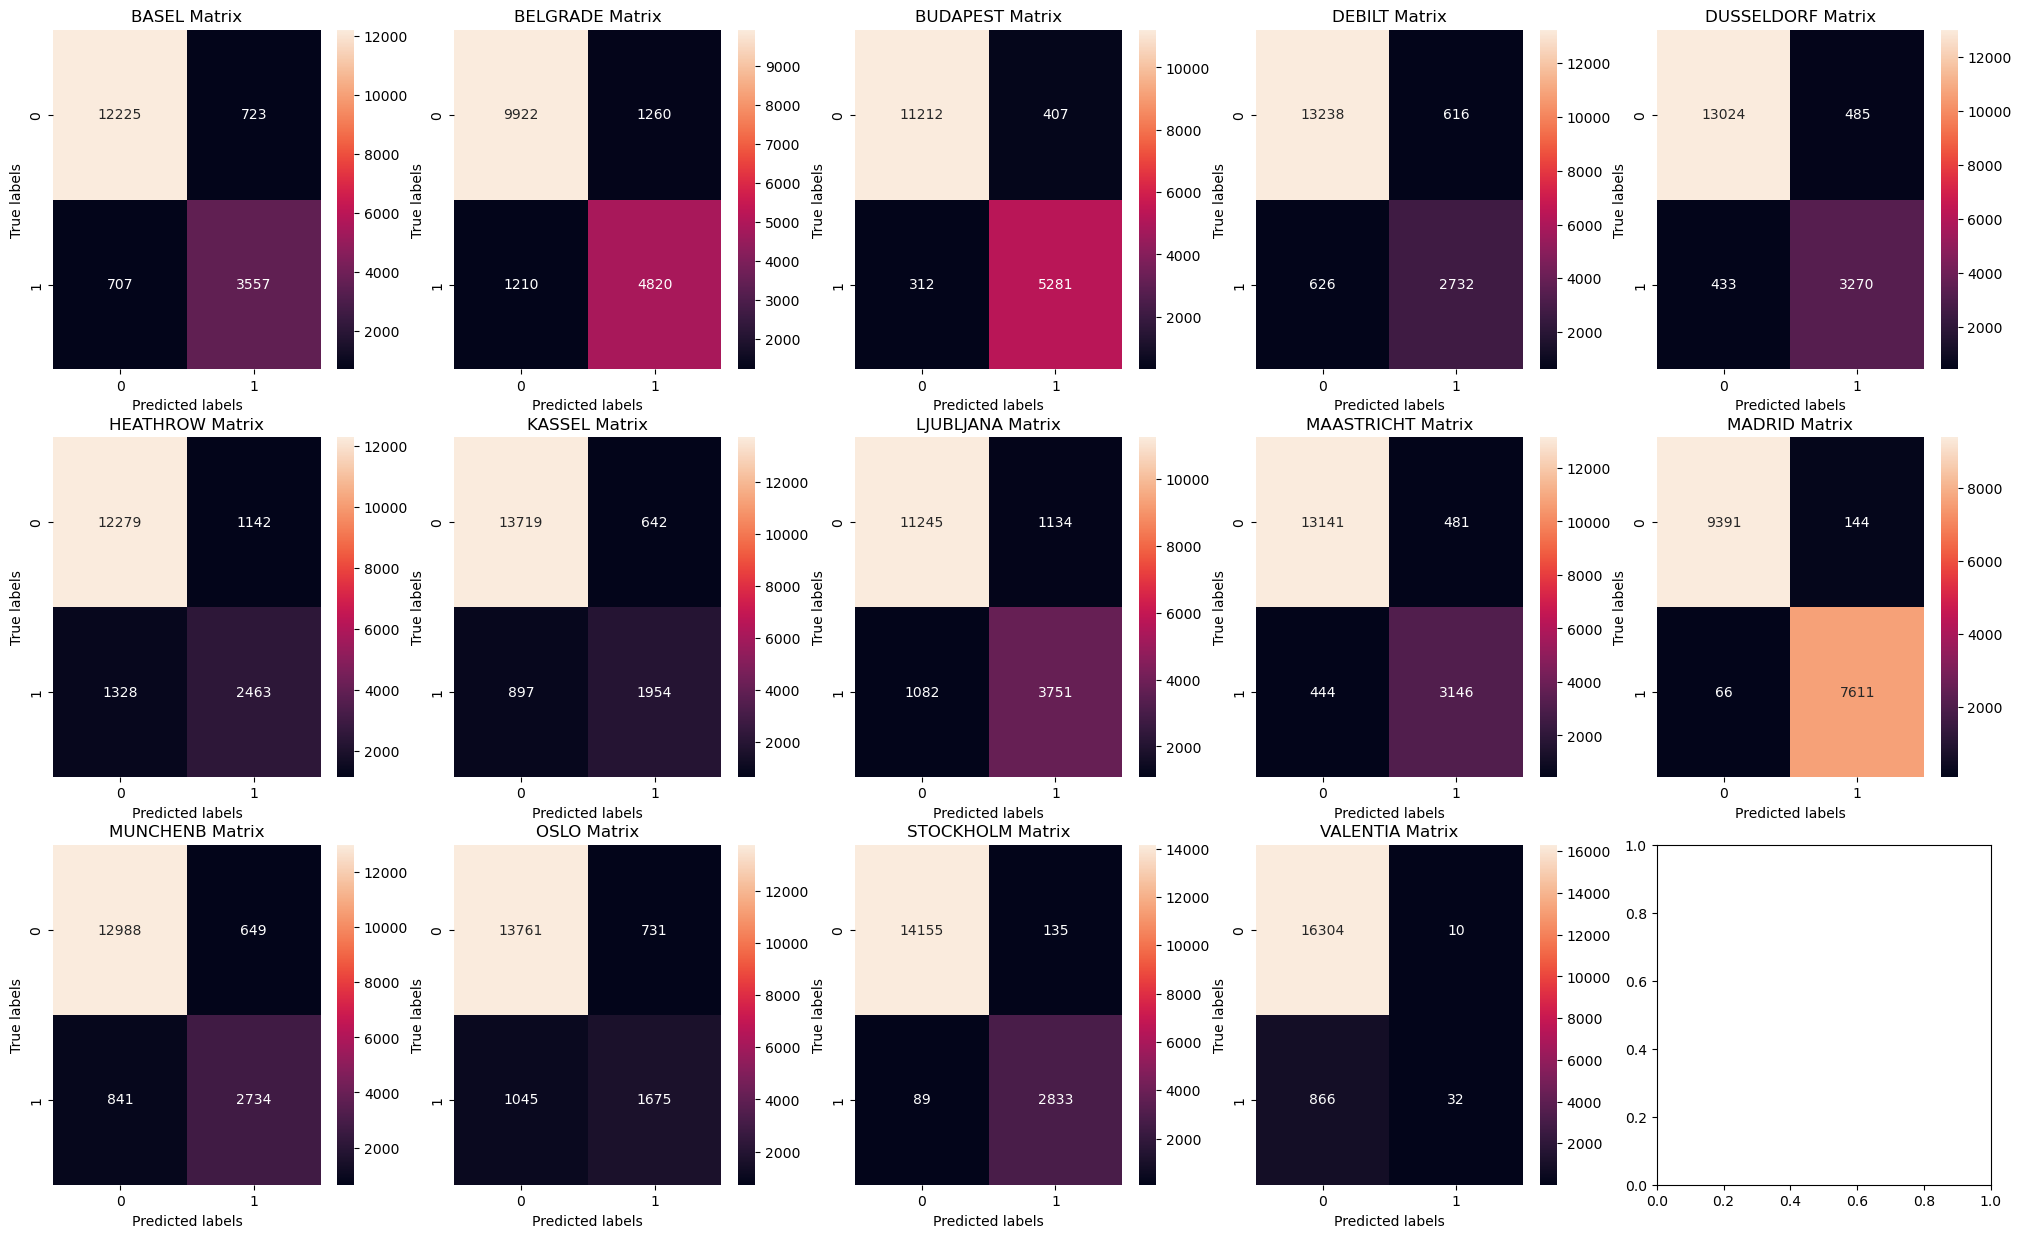

In [86]:
# Train Confusion Matrix 2

key = "_pleasant_weather"
stations = []
fig_cm_train2, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrices Train2.png")

IndexError: list index out of range

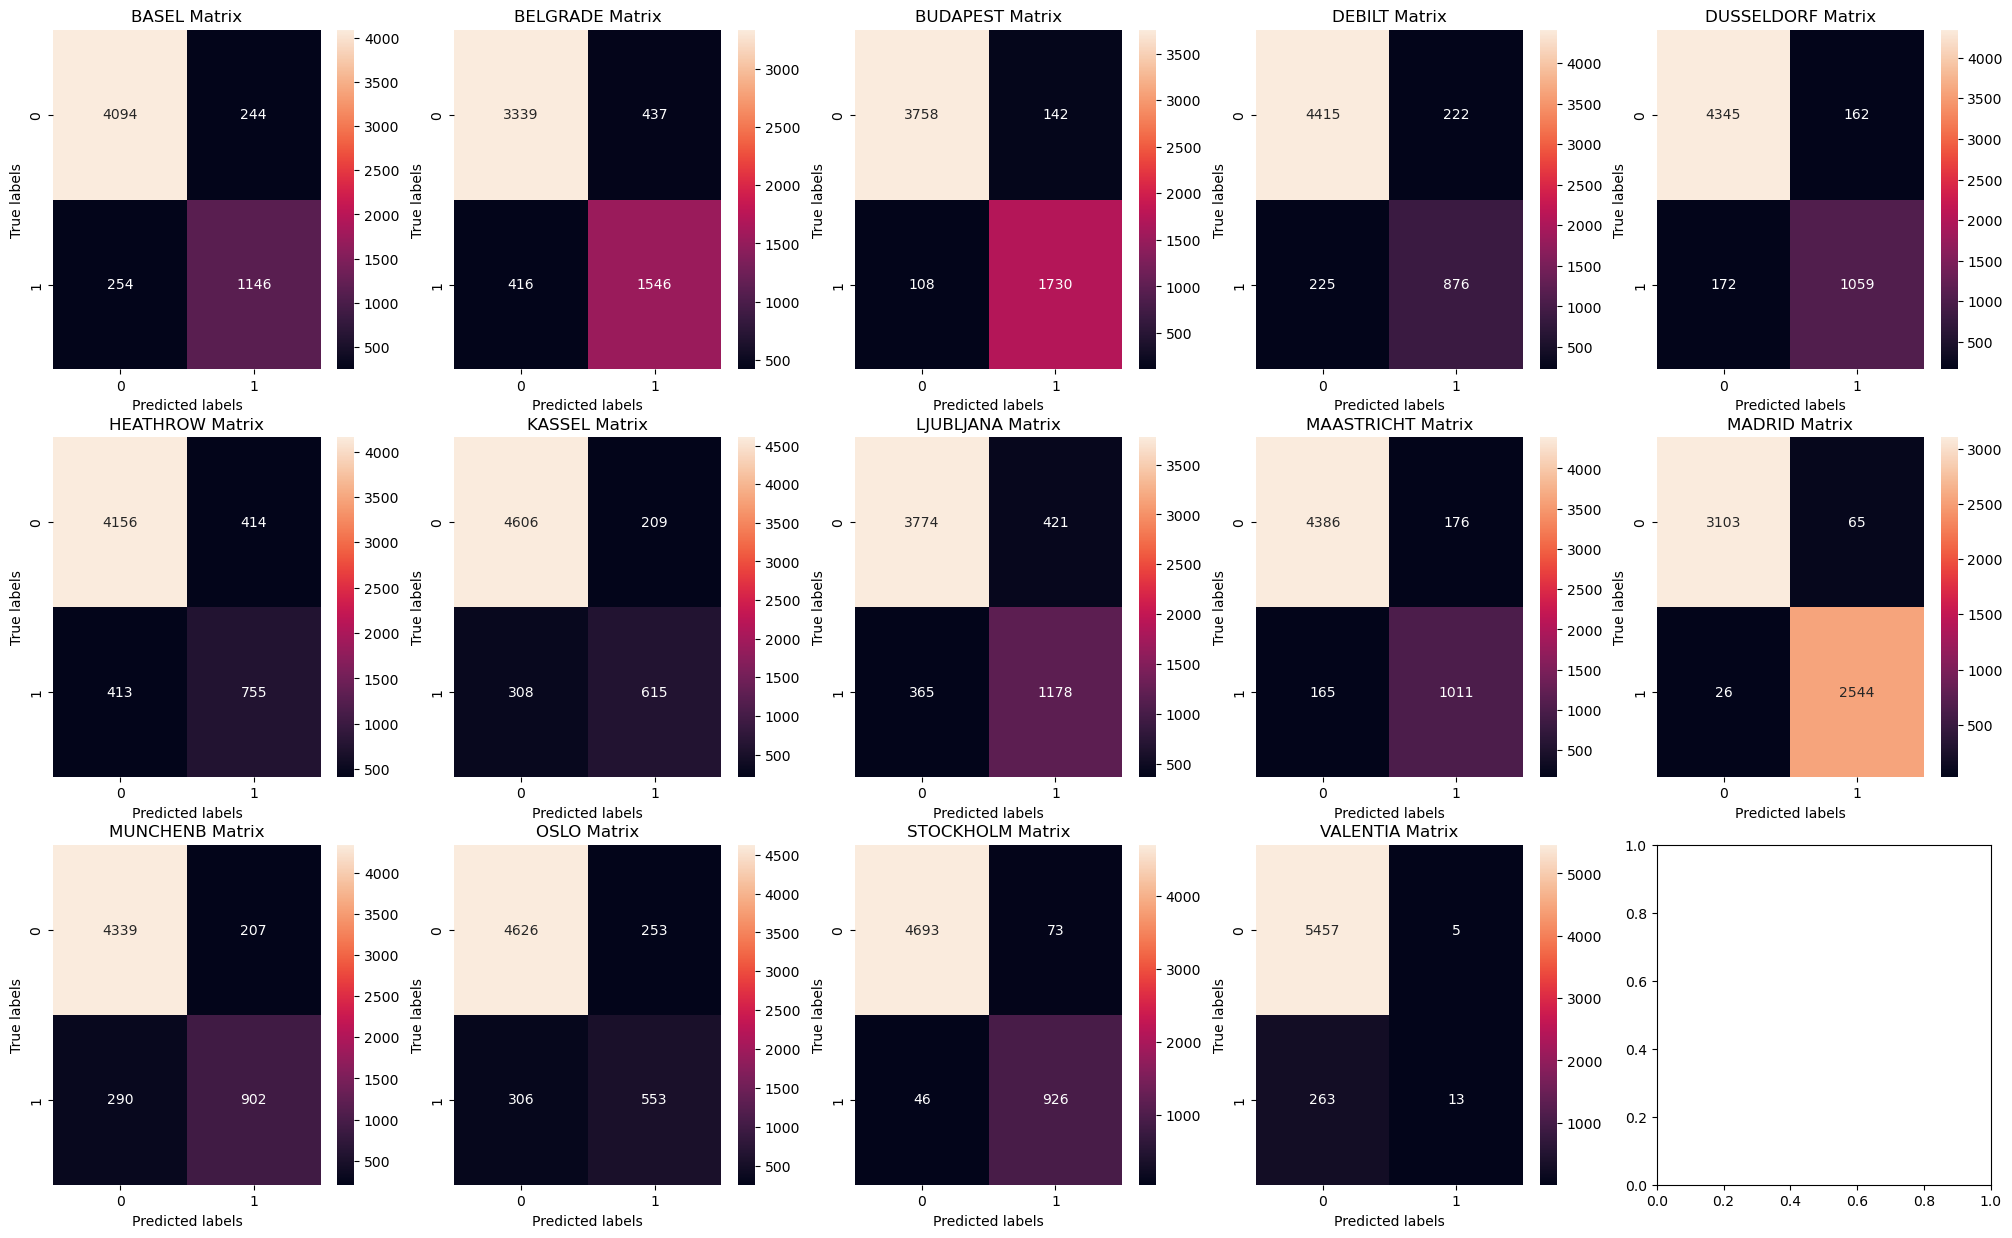

In [88]:
# Test Confusion Matrix 2

key = "_pleasant_weather"
stations = []
fig_cm_test2, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrix Test2.png")

######

##### ANN Attempt 3

In [90]:
# Create the ANN
# hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
# and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp3 = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)

# Fit the data to the model
mlp3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [92]:
y_pred = mlp3.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp3.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6706948640483383
0.6455210874869293


##### There is further improvement of the accuracy for training and testing. The original training accuracy was at 48.5% now we are at 67%. The original testing accuracy was at 49.4% and now we are at 64%. Overall the training accuracy has improved by 18% and the testing accuracy has improved by 14%. The hidden layers and iterations have been changed. The expected loss (tol) was left the same.

IndexError: list index out of range

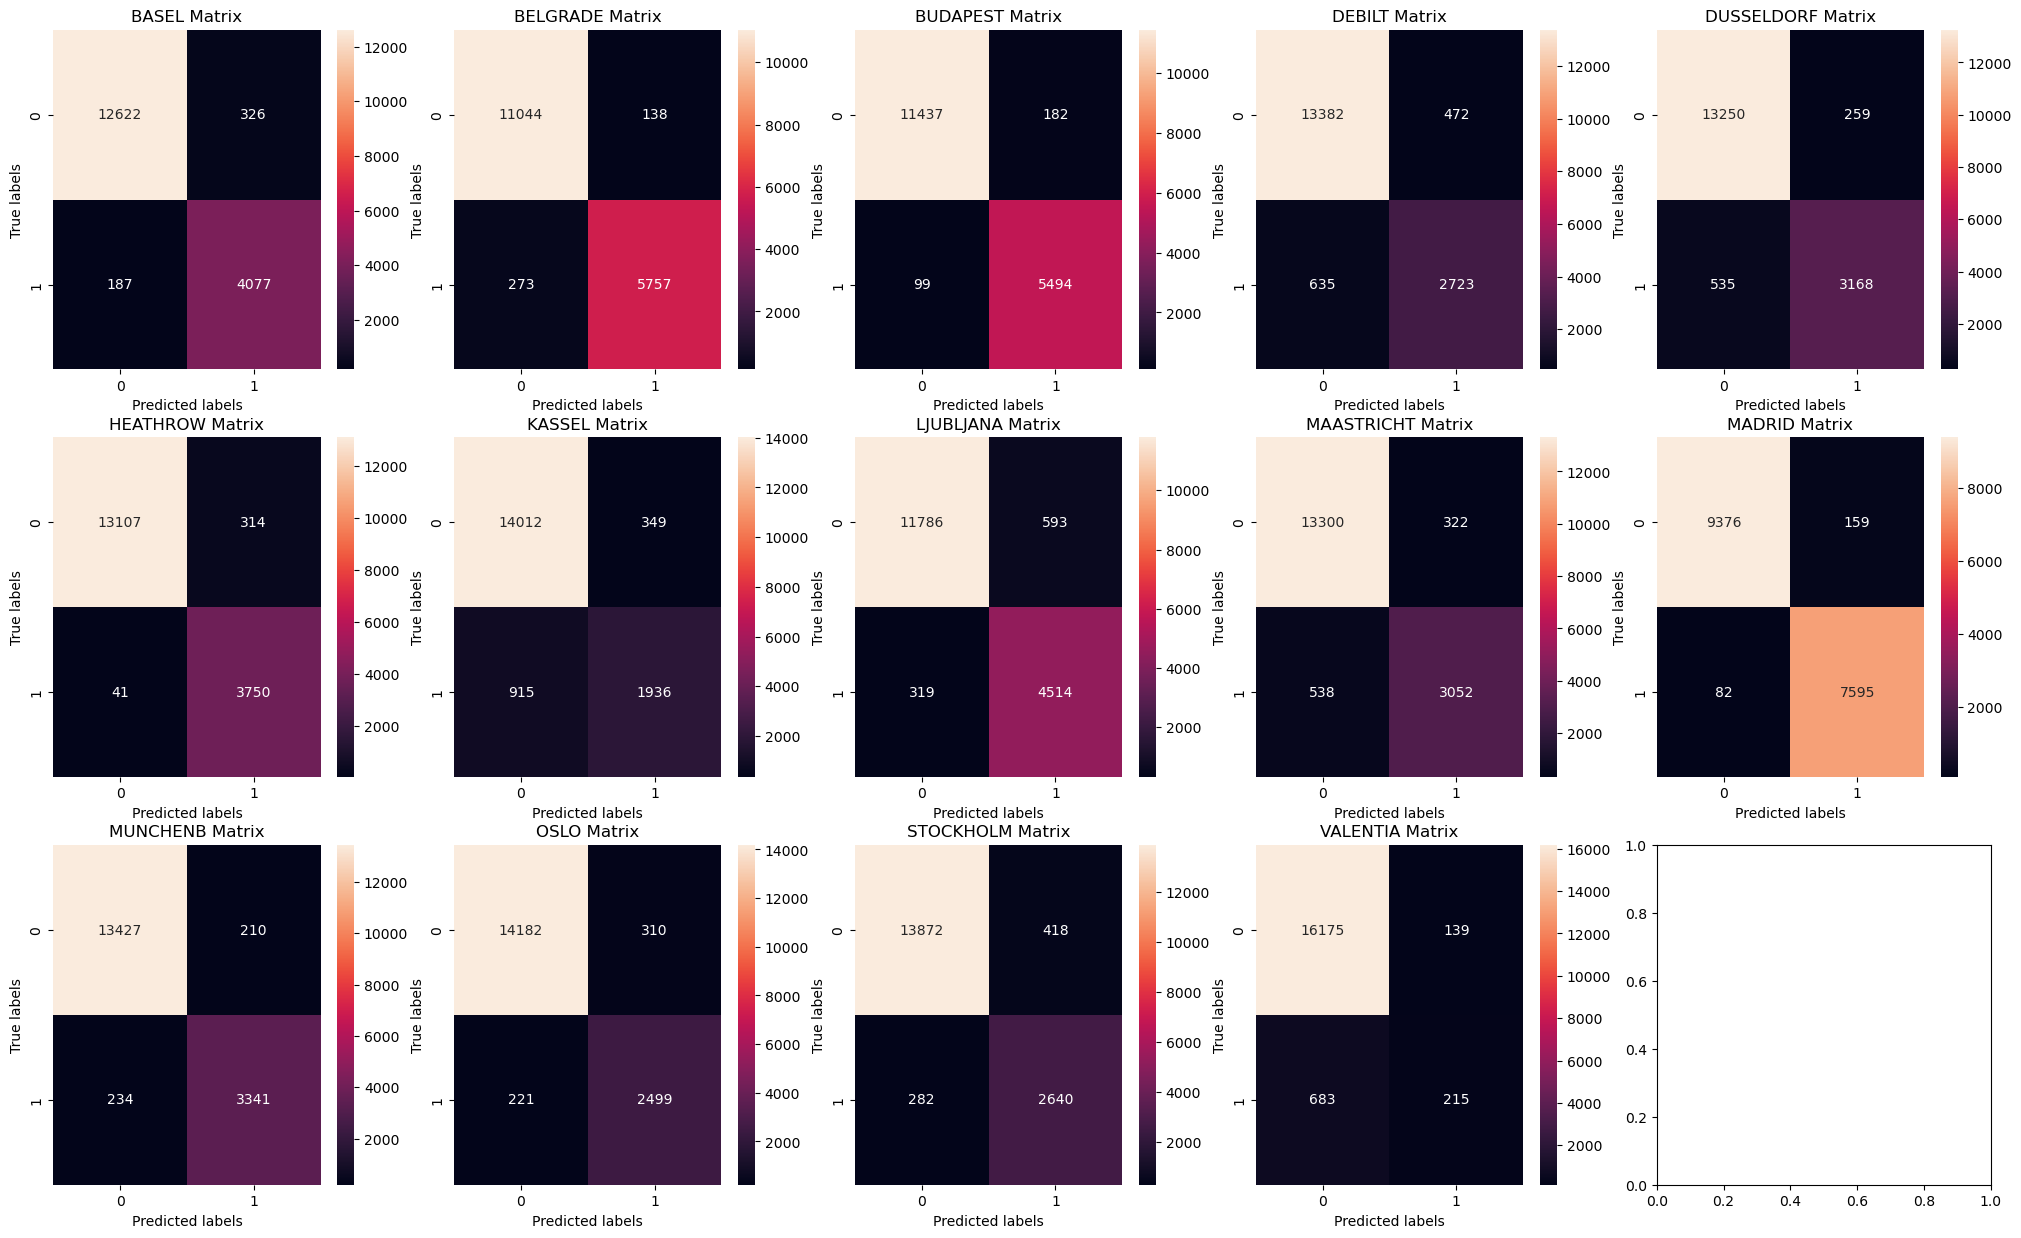

In [95]:
# Train Confusion Matrix 3

key = "_pleasant_weather"
stations = []
fig_cm_train3, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrices Train3.png")

IndexError: list index out of range

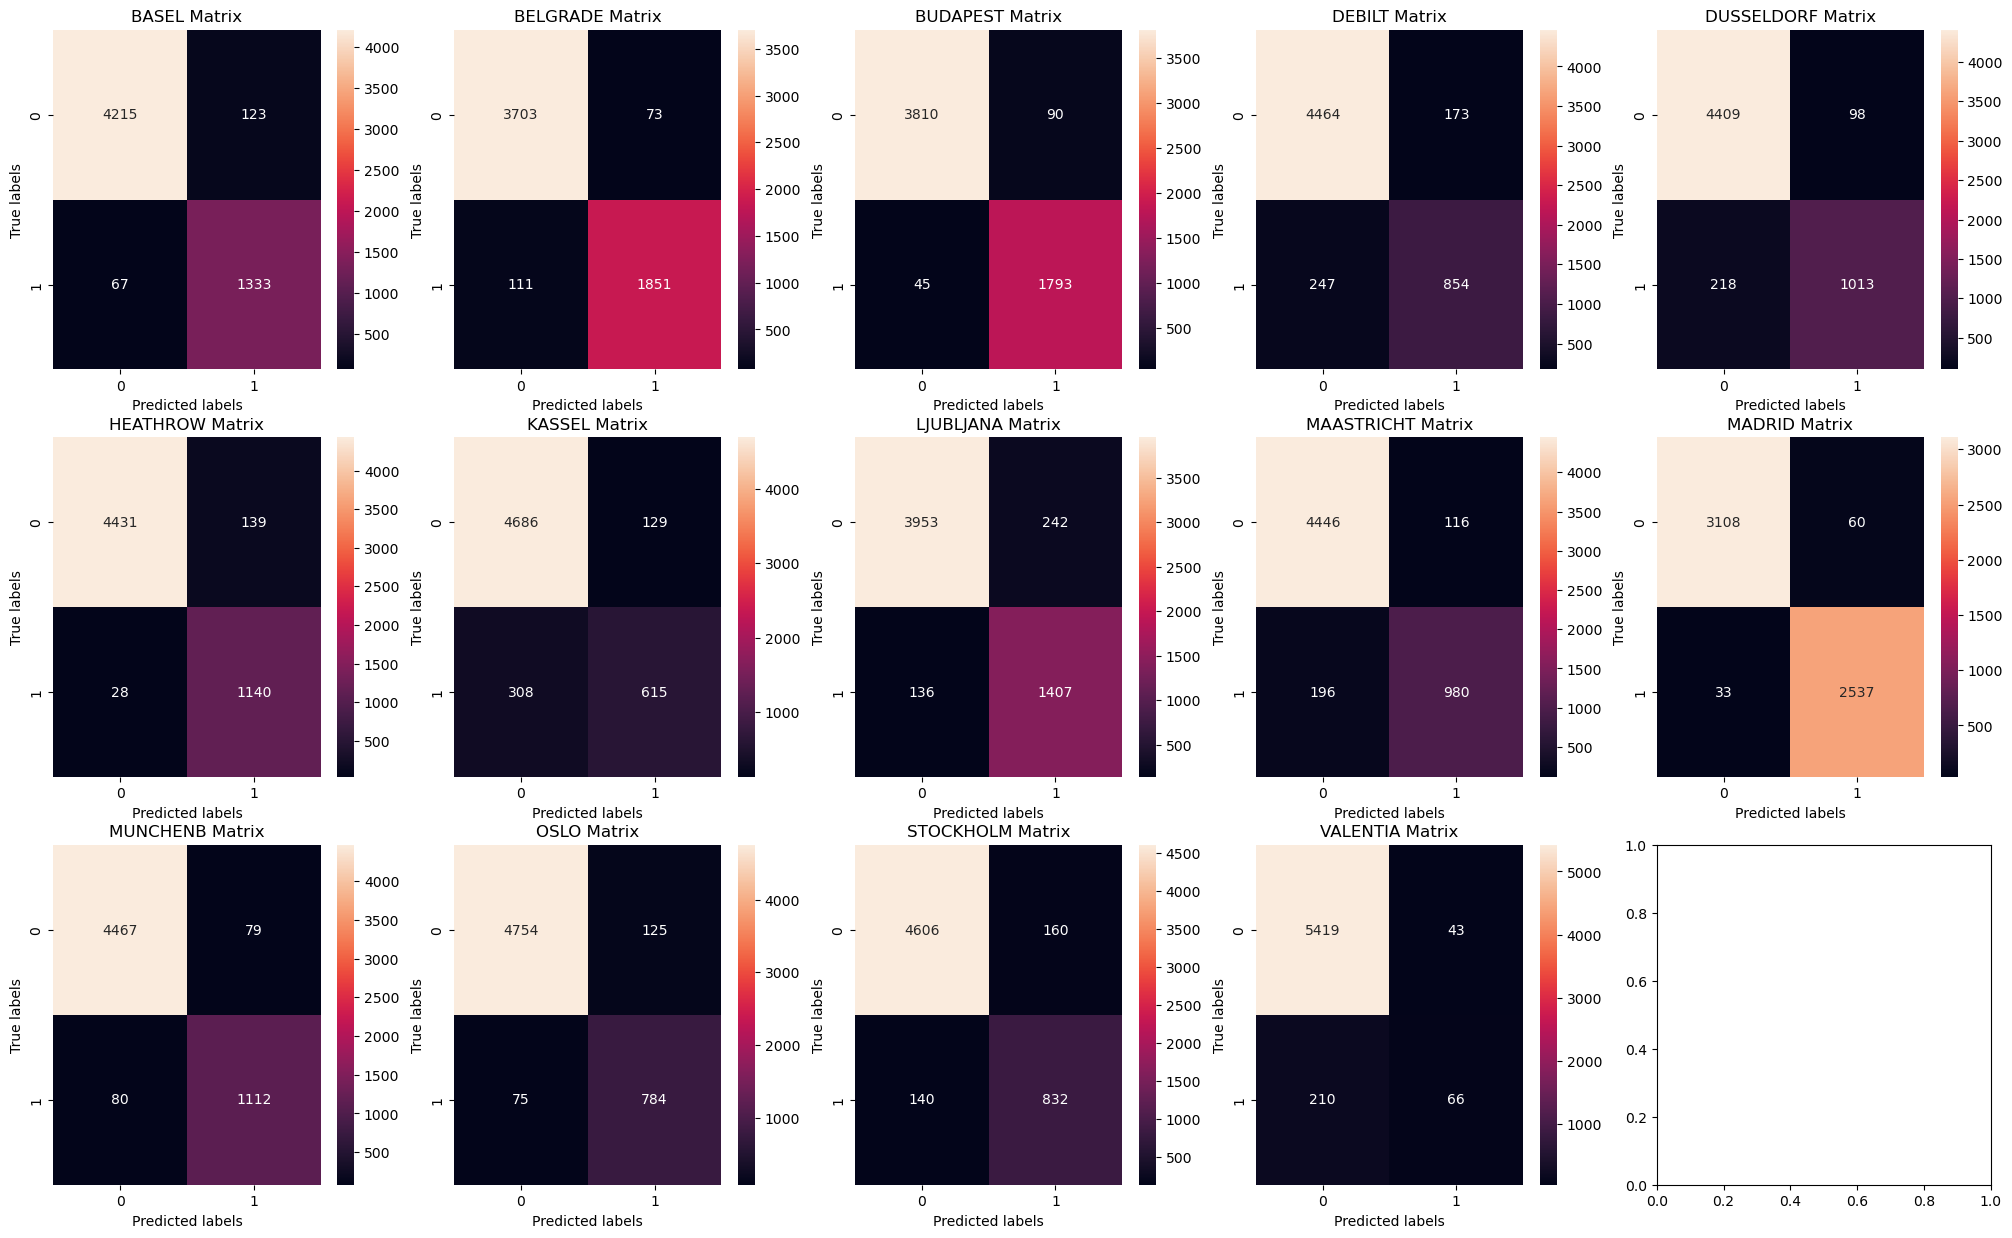

In [97]:
# Test Confusion Matrix 3

key = "_pleasant_weather"
stations = []
fig_cm_test3, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5B - Confusion Matrix Test3.png")

###### When comparing each of the training and testing matrices there is very little improvement. Our first ANN gave us an average of 72% and our testing was an average of 72.5%, not very different. In our second ANN our training average was 72% and our testing average was 73%. In the final ANN our training and testing average was 74%. That's the highest that we've seen in this script. We are still left with our top 5 places with pleasant weather being Valentia, Oslo, Kassel, Stockholm and Debilt. Nothing has changed about these top 5 places over the course of this achievement.
###### The predictions we are getting are around 75% if we continue to tweak the algorithm we may be worsening the accuracy by over fitting it. When exploring the data in Excel the sum of pleasant weather values range from 3774 to 10247. The most common pleasant months are July and August.
###### When looking at the models I've used I would lean toward using the KNN. I have a better visual perspective of the graphs and matrices plotted. This helps me better understand the trend in the data. 

#### 4. Export

In [102]:
climatewins_d.to_pickle(os.path.join(path, 'ClimateWins', 'Prepared Python Files', 'ML1 1.5 - climate_ANN.pkl'))

In [103]:
pleasant_w.to_pickle(os.path.join(path,'ClimateWins', 'Prepared Python Files', 'ML1 1.5 - pleasant_ANN.pkl'))